In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'statsmodels'

In [37]:
data_csv = pd.read_csv("./data.csv", index_col = 0)

In [38]:
cols = []
cols_total = data_csv.columns
cols_remove = ["init_vote_result", # regressand
               "legislature_int", "init_id", "init_date_vote", "init_year_vote", "init_type", # strings
               "count_women", "age_7079_women", "maj_rel_coal", "maj_abs_coal_men_cds", 
               "maj_abs_coal_women_cds", "maj_abs_single_men_cds", "maj_abs_single_men_be", 
               "maj_abs_single_men_pev", "maj_abs_single_men_pcp", "maj_abs_single_women_cds",
               "maj_abs_single_women_be", "maj_abs_single_women_pev", "maj_abs_single_women_pcp",
               "maj_rel_coal_men_psd", "maj_rel_coal_men_cds", "maj_rel_coal_men_ps", 
               "maj_rel_coal_men_be", "maj_rel_coal_men_pev", "maj_rel_coal_men_pcp", 
               "maj_rel_coal_women_psd", "maj_rel_coal_women_cds", "maj_rel_coal_women_ps", 
               "maj_rel_coal_women_be", "maj_rel_coal_women_pev", "maj_rel_coal_women_pcp",
               "maj_rel_single_men_cds", "maj_rel_single_men_be", "maj_rel_single_men_pev", 
               "maj_rel_single_men_pcp", "maj_rel_single_women_cds", "maj_rel_single_women_be", 
               "maj_rel_single_women_pev", "maj_rel_single_women_pcp", "count_men_cds", 
               "count_men_pev", "count_women_cds", "count_women_pev", "gov_ps", "gov_be", "gov_pev", "gov_pcp"]

for i in cols_total:
    if i not in cols_remove:
        cols.append(i)

In [95]:
data_csv[["legislature_int", "share_women"]]

legislature_int  share_women
2                    6     0.000000
5                    6     0.000000
6                    6     0.000000
9                    6     0.000000
13                   6     0.200000
14                   6     0.272727
18                   6     0.181818
20                   6     0.000000
23                   6     0.000000
24                   6     0.200000
27                   6     0.000000
28                   6     0.000000
31                   6     0.000000
38                   6     0.200000
41                   6     0.000000
44                   6     1.000000
47                   6     1.000000
48                   6     0.000000
51                   6     0.000000
54                   6     0.000000
57                   6     0.333333
58                   6     0.300000
59                   6     0.300000
62                   6     0.300000
65                   6     0.000000
66                   6     0.500000
67                   6     0.500000
68                   6     0.500000
73                   6     0.285714
76                   6     0.000000
...                ...          ...
13722               13     0.250000
13723               13     0.315789
13724               13     0.500000
13726               13     0.384615
13728               13     0.285714
13730               13     0.000000
13732               13     0.250000
13733               13     0.250000
13736               13     0.315789
13741               13     0.333333
13742               13     0.315789
13744               13     0.500000
13746               13     0.500000
13747               13     0.315789
13748               13     0.315789
13752               13     0.208333
13753               13     0.166667
13756               13     0.400000
13757               13     0.315789
13758               13     0.454545
13759               13     0.333333
13761               13     0.333333
13762               13     0.315789
13765               13     0.500000
13766               13     0.421053
13767               13     0.421053
13768               13     0.421053
13773               13     0.500000
13774               13     0.454545
13775               13     0.461538

[6447 rows x 2 columns]

In [39]:
data = sm.add_constant(data_csv[cols])

In [41]:
data.head()

const  count_events  count_past_votes  count_men  age_men_mean  \
2     1.0             9                 3          6     43.666667   
5     1.0             8                 3          3     45.000000   
6     1.0             8                 2          4     40.750000   
9     1.0             8                 3          5     33.400000   
13    1.0             9                 3          4     39.250000   

    age_women_mean  age_men_var  age_women_var  inter_men_mean  \
2              0.0     9.555556            0.0           42.00   
5              0.0    98.666667            0.0           37.00   
6              0.0    68.687500            0.0           44.25   
9              0.0    30.640000            0.0           19.00   
13            51.0    12.187500            0.0           18.75   

    inter_women_mean      ...       2014  2015  2016  2017  count_total  \
2                0.0      ...        0.0   0.0   0.0   0.0            6   
5                0.0      ...        0.0   0.0   0.0   0.0            3   
6                0.0      ...        0.0   0.0   0.0   0.0            4   
9                0.0      ...        0.0   0.0   0.0   0.0            5   
13              79.0      ...        0.0   0.0   0.0   0.0            5   

    share_women   age_mean  inter_mean  comi_mean  share_lawyer  
2           0.0  43.666667       42.00        1.0      0.333333  
5           0.0  45.000000       37.00        1.0      0.666667  
6           0.0  40.750000       44.25        1.0      0.500000  
9           0.0  33.400000       19.00        1.0      0.200000  
13          0.2  41.600000       30.80        1.0      0.400000  

[5 rows x 137 columns]

# Begin

In [45]:
data = sm.add_constant(data_csv[cols])
y = data_csv.init_vote_result
X = data

In [49]:
y = data_csv.init_vote_result
X = data
model = sm.OLS(y,X)
results = model.fit()

In [84]:
y_hat = results.predict(X).values
counts = [0, 0, 0]
for i in y_hat:
    if i < 0:
        counts[0] += 1
    elif i > 1:
        counts[1] += 1
    counts[2] += 1
print("Percent below 0:", round(100*counts[0]/counts[2], 2), "%")
print("Percent above 1:", round(100*counts[1]/counts[2], 2), "%")
print("Fucked in ", round(100*(counts[0]+counts[1])/counts[2], 2), "%")

Percent below 0: 0.78 %
Percent above 1: 6.72 %
Fucked in  7.49 %


In [88]:
y.values[1]

1

## GOF - Percent Correctly Predicted

In [92]:
correct = 0
for  i, hat in enumerate(y_hat):
    if hat >= 0.5:
        if y.values[i] == 1:
            correct += 1
    elif hat < 0.5:
        if y.values[i] == 0:
            correct += 1
print("Right in", round(100*(correct)/len(y), 2), "%")

Right in 77.11 %


/opt/anaconda/anaconda3/envs/gis/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.0039061 , 0.        , 0.        , 0.        , 0.        ,
        0.0039061 , 0.0273427 , 0.06249759, 0.03906099, 0.04687319,
        0.26561477, 0.53904173, 0.57029053, 0.95308827, 1.04292856,
        0.91402728, 0.91402728, 1.10152006, 1.02339807, 1.22651524,
        1.11714445, 1.20307864, 1.17182985, 0.99605537, 1.05074076,
        1.12886275, 1.03121026, 1.07027126, 1.23042134, 1.05074076,
        0.91402728, 0.7968443 , 0.67575521, 0.71872231, 0.49998073,
        0.45310754, 0.34373675, 0.27342696, 0.15624398, 0.11327689,
        0.12890128, 0.10546469, 0.10546469, 0.0351549 , 0.0312488 ,
        0.0195305 , 0.0078122 , 0.0039061 , 0.0078122 , 0.0078122 ]),
 array([-0.399149  , -0.35943908, -0.31972916, -0.28001924, -0.24030931,
        -0.20059939, -0.16088947, -0.12117955, -0.08146963, -0.04175971,
        -0.00204978,  0.03766014,  0.07737006,  0.11707998,  0.1567899 ,
         0.19649982,  0.23620975,  0.27591967,  0.31562959,  0.35533951,
         0.39504943,  0.43

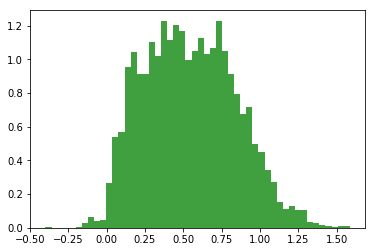

In [76]:
plt.hist(results.predict(X).values, 50, normed=1, facecolor='green', alpha=0.75)

In [67]:
X.as_matrix*list(results.params.values)

array([[ 0.58792637, -0.35331962,  0.44804754, ..., -0.00378333,
        -0.04194107,  0.01643981],
       [ 0.58792637, -0.31406188,  0.44804754, ..., -0.00333293,
        -0.04194107,  0.03287962],
       [ 0.58792637, -0.31406188,  0.29869836, ..., -0.00398601,
        -0.04194107,  0.02465971],
       ...,
       [ 0.58792637, -0.27480415,  0.29869836, ..., -0.05014411,
        -0.15378391,  0.01643981],
       [ 0.58792637, -0.23554641,  0.14934918, ..., -0.03712903,
        -0.13726167,  0.00896717],
       [ 0.58792637, -0.27480415,  0.14934918, ..., -0.0342024 ,
        -0.13550191,  0.0075876 ]])